Course : Deep Learning  
Program : MBA Tech AI  
Sem : 🇻  
Academic year : 2024-25  
Instructor : Radhika Chaperneri
Name : Dhruv Pithadia  
Roll No : R013
Batch : B1
Date : 29-08-2024 

In [34]:
import keras
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [35]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [36]:
X_train.shape

(60000, 28, 28)

In [37]:
Y_train.shape

(60000,)

In [38]:
X_test.shape

(10000, 28, 28)

In [39]:
Y_test.shape

(10000,)

In [40]:
img_rows, img_cols = 28, 28

In [41]:
X_train_mlp = X_train.reshape(X_train.shape[0], img_rows*img_cols)
Y_train_mlp = Y_train

X_test_mlp = X_test.reshape(X_test.shape[0], img_rows*img_cols)
Y_test_mlp = Y_test

In [42]:
X_train_mlp.shape

(60000, 784)

In [43]:
print("X_train shape", X_train.shape, "Y_train shape", Y_train.shape)

X_train shape (60000, 28, 28) Y_train shape (60000,)


Y = 2 Pullover


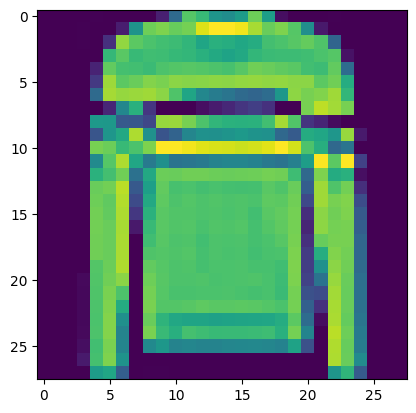

In [44]:
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2
                        "Dress",        # index 3
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6
                        "Sneaker",      # index 7
                        "Bag",          # index 8
                        "Ankle boot"]   # index 9
 
img_index = 5
 
label_index = Y_train[img_index]
 
print ("Y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
 
plt.imshow(X_train[img_index])

In [45]:
print(X_train_mlp.shape)

(60000, 784)


In [46]:
X_train_mlp[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,
         4,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,
        54,   0,   0,   0,   1,   3,   4,   0,   0,   3,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204,
       176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [47]:
X_train_mlp = X_train_mlp.astype('float32')
X_test_mlp = X_test_mlp.astype('float32')
X_train_mlp /= 255
X_test_mlp /= 255

In [48]:
X_train_mlp[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [49]:
num_classes = 10

In [50]:
Y_train_mlp = keras.utils.to_categorical(Y_train_mlp, num_classes)
Y_test_mlp = keras.utils.to_categorical(Y_test_mlp, num_classes)

In [51]:
Y_train_mlp[:5, :]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [52]:
X_train_mlp, X_val_mlp, Y_train_mlp, Y_val_mlp = train_test_split(X_train_mlp, Y_train_mlp, test_size=0.2)

In [53]:
print(X_test_mlp.shape)
print(X_val_mlp.shape)

(10000, 784)
(12000, 784)


Multi Layer Perceptron

In [54]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD
from keras.datasets import fashion_mnist
#from keras.utils import np_utils

In [55]:
batch_size = 256
num_epochs = 50

In [58]:
model = Sequential()

model.add(Dense(input_dim = 784, activation='sigmoid', units=625, kernel_initializer='normal'))

model.add(Dense(input_dim = 625, activation='softmax', units=10, kernel_initializer='normal'))

model.compile(optimizer=SGD(learning_rate=0.05), loss = 'categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 625)               490625    
                                                                 
 dense_4 (Dense)             (None, 10)                6260      
                                                                 
Total params: 496885 (1.90 MB)
Trainable params: 496885 (1.90 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
history = model.fit(X_train_mlp, Y_train_mlp,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_data=(X_val_mlp, Y_val_mlp))

Epoch 1/50


188/188 [==============================] - 2s 8ms/step - loss: 1.3797 - accuracy: 0.6360 - val_loss: 0.9868 - val_accuracy: 0.7012
Epoch 2/50
188/188 [==============================] - 1s 5ms/step - loss: 0.8535 - accuracy: 0.7346 - val_loss: 0.7882 - val_accuracy: 0.7344
Epoch 3/50
188/188 [==============================] - 1s 6ms/step - loss: 0.7277 - accuracy: 0.7566 - val_loss: 0.7208 - val_accuracy: 0.7487
Epoch 4/50
188/188 [==============================] - 1s 6ms/step - loss: 0.6666 - accuracy: 0.7711 - val_loss: 0.6674 - val_accuracy: 0.7677
Epoch 5/50
188/188 [==============================] - 1s 6ms/step - loss: 0.6284 - accuracy: 0.7826 - val_loss: 0.6291 - val_accuracy: 0.7781
Epoch 6/50
188/188 [==============================] - 1s 6ms/step - loss: 0.5998 - accuracy: 0.7913 - val_loss: 0.6022 - val_accuracy: 0.7908
Epoch 7/50
188/188 [==============================] - 1s 6ms/step - loss: 0.5782 - accuracy: 0.7988 - val_loss: 0.5832 - val_accuracy: 0.7986
Epoc

In [61]:
score  = model.evaluate(X_test_mlp, Y_test_mlp, verbose = 1)
print()
print('MLP Test Loss:' , score[0])
print('MLP Test Accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.4548 - accuracy: 0.8384

MLP Test Loss: 0.45481958985328674
MLP Test Accuracy: 0.8384000062942505


Deep Multi Layer Perceptron